Read in fasta file:

In [5]:
def parse_fasta(path):
    fasta_list = {}
    fasta_file = open(path,"r")
    fasta = fasta_file.read()
    total = fasta.split(">")[1:]
    for i in total:
        name_seq = i.split()
        name = name_seq[0]
        seq = "".join(name_seq[1:])
        fasta_list[name] = seq
        
    fasta_file.close()
    return fasta_list

print(parse_fasta("project1.fasta"))

{'one': 'mississippi', 'two': 'mississippimississippi'}


Read in fastq file:

In [51]:
def parse_fastq(path):
    fastq_list = {}
    fastq_file = open(path,"r")
    fastq = fastq_file.read()
    reads=fastq.split("@")[1:]
    for read in reads:
        nameseq_qual = read.split("+")
        name_seq = nameseq_qual[0].split()
        fastq_list[name_seq[0]]=[name_seq[1], nameseq_qual[1].strip()]
    fastq_file.close()
    return fastq_list

print(parse_fastq("random.fastq"))

{'10': ['bqajyqemhg', '~~~~~~~~~~'], '100': ['raaunskhopxxyszbwtxpewpqimjtqfvowvvvrvhrcujknshqigstklhprfafvrlzwyjswqbciadyuogbpvacobjemqeezrznmkpc', '~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'], '1000': ['klqhebzwvvdrebpjythbwelohejgfxpnqttemaoypqxpovhpjfzzcvstziaivaofyabuogwbwjwcjkmwkpcpigaqbyqqwdkjtueiomiednqanrjnozhxvkylwnspddnjzcklukbyufoevykghucqjnkhptrzpanrqftlcffpwxkdnyypuwzmsefbxdywvjvkgtxltfutvszbxnxxsxobaaiizckoitmyamxaxadhmkkybbzofsqernjmhpakwowmtsqtzboqgpqwergufqlmlzdbaxtxvqesbryudmjmpzbfllllbjjqrepudijhexkwxztponpwzbxbtqizkpjcrcimmarkkorzvxfdefhikepgacaexqbgqvmqnfktangckokfevwkbobimsacwqilgbhiakrpulbnwoynsxwwppamkrdqppezijeixxxeeurteslyrxbrbkegpaguipnzaqhkprasfvhootiryunqctvbwioskcidezehnxnyddoluzfbupdagnxuawhomctgfhkuqqfytabapqdteojdeagetqhkhwithbcihphlrrjqbhqellcoxpkpdxwtsnisqluusgivafkezclsvtruojabcdpefyaatcwowkprkjkrhgsbvaznhkuckhbvfoovxfbywwiappedgaczafzfziyepynnywbifhgiuijiyhwpsrfgshapyshpduxnwenpxnnfzabmkkwt

Naive implementation (O(n^2)) - one indexing output

In [34]:
def naive(pattern, x):
    p_len = len(pattern)
    for i in range(len(x)-p_len):
        j = 0
        while j<len(pattern) and pattern[j] == x[i+j]:
            j+=1
                
        if j == len(pattern):
            yield i+1
                

Output in SAM: 

In [8]:
def output_naive(fasta, fastq):
    fasta_dic = parse_fasta(fasta)
    fastq_dic = parse_fastq(fastq)
    for fq in fastq_dic:
        for fa in fasta_dic:
            pattern = fastq_dic[fq][0]
            qual = fastq_dic[fq][1]
            x = fasta_dic[fa]
            for match in naive(pattern,x):
                print("{}\t0\t{}\t{}\t0\t{}M\t*\t0\t0\t{}\t{}".format(fq, fa,match,len(pattern),pattern,qual))

output_naive("project1.fasta","project1.fastq")
    

iss	0	one	2	0	3M	*	0	0	iss	~~~
iss	0	one	5	0	3M	*	0	0	iss	~~~
iss	0	two	2	0	3M	*	0	0	iss	~~~
iss	0	two	5	0	3M	*	0	0	iss	~~~
iss	0	two	13	0	3M	*	0	0	iss	~~~
iss	0	two	16	0	3M	*	0	0	iss	~~~
mis	0	one	1	0	3M	*	0	0	mis	~~~
mis	0	two	1	0	3M	*	0	0	mis	~~~
mis	0	two	12	0	3M	*	0	0	mis	~~~
ssi	0	one	3	0	3M	*	0	0	ssi	~~~
ssi	0	one	6	0	3M	*	0	0	ssi	~~~
ssi	0	two	3	0	3M	*	0	0	ssi	~~~
ssi	0	two	6	0	3M	*	0	0	ssi	~~~
ssi	0	two	14	0	3M	*	0	0	ssi	~~~
ssi	0	two	17	0	3M	*	0	0	ssi	~~~
ssippi	0	one	6	0	6M	*	0	0	ssippi	~~~~~~
ssippi	0	two	6	0	6M	*	0	0	ssippi	~~~~~~
ssippi	0	two	17	0	6M	*	0	0	ssippi	~~~~~~


In [9]:
def output_naive(fasta, fastq):
    fasta_dic = parse_fasta(fasta)
    fastq_dic = parse_fastq(fastq)
    output = open("output_naive.txt","w")
    for fq in fastq_dic:
        for fa in fasta_dic:
            pattern = fastq_dic[fq][0]
            qual = fastq_dic[fq][1]
            x = fasta_dic[fa]
            for match in naive(pattern,x):
                output.write("{}\t0\t{}\t{}\t0\t{}M\t*\t0\t0\t{}\t{}\n".format(fq, fa,match,len(pattern),pattern,qual))
output_naive("project1.fasta","project1.fastq")

Implementation of the border array algoritm. One indexing output

In [10]:
def border_array(pattern,x):
    pattern1 = pattern +"$"
    #border array for pattern 
    BP = [0]*len(pattern1)
    for i in range(1,len(pattern1)):
        b = BP[i-1]
        while b>0 and pattern1[i] != pattern1[b]:
            b = BP[b-1]
        if pattern1[i] == pattern1[b]:
            BP[i] = b+1
        else:
            BP[i] = 0
    #border array for pattern$x
    B = [0]*len(x)
    for i in range(0,len(x)):
        if i == 0:
            b=0
        else:
            b = B[i-1]
        while b>0 and x[i] != pattern1[b]:
            b = BP[b-1]
        if x[i] == pattern1[b]:
            B[i] = b+1
        else:
            B[i] = 0
    for i in range(len(B)):
        if B[i] == len(pattern):
            yield (i-(len(pattern)-1)+1) 

In [11]:
def output_borderarray(fasta, fastq):
    fasta_dic = parse_fasta(fasta)
    fastq_dic = parse_fastq(fastq)
    for fq in fastq_dic:
        for fa in fasta_dic:
            pattern = fastq_dic[fq][0]
            qual = fastq_dic[fq][1]
            x = fasta_dic[fa]
            for match in border_array(pattern,x):
                print("{}\t0\t{}\t{}\t0\t{}M\t*\t0\t0\t{}\t{}".format(fq, fa,match,len(pattern),pattern,qual))

output_borderarray("project1.fasta","project1.fastq")

iss	0	one	2	0	3M	*	0	0	iss	~~~
iss	0	one	5	0	3M	*	0	0	iss	~~~
iss	0	two	2	0	3M	*	0	0	iss	~~~
iss	0	two	5	0	3M	*	0	0	iss	~~~
iss	0	two	13	0	3M	*	0	0	iss	~~~
iss	0	two	16	0	3M	*	0	0	iss	~~~
mis	0	one	1	0	3M	*	0	0	mis	~~~
mis	0	two	1	0	3M	*	0	0	mis	~~~
mis	0	two	12	0	3M	*	0	0	mis	~~~
ssi	0	one	3	0	3M	*	0	0	ssi	~~~
ssi	0	one	6	0	3M	*	0	0	ssi	~~~
ssi	0	two	3	0	3M	*	0	0	ssi	~~~
ssi	0	two	6	0	3M	*	0	0	ssi	~~~
ssi	0	two	14	0	3M	*	0	0	ssi	~~~
ssi	0	two	17	0	3M	*	0	0	ssi	~~~
ssippi	0	one	6	0	6M	*	0	0	ssippi	~~~~~~
ssippi	0	two	6	0	6M	*	0	0	ssippi	~~~~~~
ssippi	0	two	17	0	6M	*	0	0	ssippi	~~~~~~


Implementation of KMP (first is the standard border array algoritm with the bax borders as well)

In [12]:
def border_array_lin(x):
    B = [0]*len(x)
    bax = [0]*len(x)
    #make a border array
    for i in range(1,len(x)):
        b = B[i-1]
        while b>0 and x[i] != x[b]:
            b = B[b-1]
        if x[i] == x[b]:
            B[i] = b+1
            b+=1
        else:
            B[i] = 0
            b=0
        #make bax - longest border where the following characters differ
        if i == len(x)-1:
            bax[i] = b
        elif x[i+1] != x[b]:
            bax[i] = b
        else:
            bax[i] = bax[B[b-1]]

    return bax

def KMP(x, p):
    bax = border_array_lin(p)
    m = len(p)-1
    i=0
    j=0
    while j<len(x)-m+i:
        if x[j] == p[i]:
            if i == m:
                yield (j-m+1)
                j+=1
                i = bax[i]
            else:
                j+=1
                i+=1
        elif i == 0:
            j+=1
        else:
            i = bax[i-1]


In [13]:
def output_KMP(fasta,fastq):
    fasta_dic = parse_fasta(fasta)
    fastq_dic = parse_fastq(fastq)
    for fq in fastq_dic:
        for fa in fasta_dic:
            pattern = fastq_dic[fq][0]
            qual = fastq_dic[fq][1]
            x = fasta_dic[fa]
            for match in KMP(x,pattern):
                print("{}\t0\t{}\t{}\t0\t{}M\t*\t0\t0\t{}\t{}".format(fq, fa,match,len(pattern),pattern,qual))

output_KMP("project1.fasta","project1.fastq")

iss	0	one	2	0	3M	*	0	0	iss	~~~
iss	0	one	5	0	3M	*	0	0	iss	~~~
iss	0	two	2	0	3M	*	0	0	iss	~~~
iss	0	two	5	0	3M	*	0	0	iss	~~~
iss	0	two	13	0	3M	*	0	0	iss	~~~
iss	0	two	16	0	3M	*	0	0	iss	~~~
mis	0	one	1	0	3M	*	0	0	mis	~~~
mis	0	two	1	0	3M	*	0	0	mis	~~~
mis	0	two	12	0	3M	*	0	0	mis	~~~
ssi	0	one	3	0	3M	*	0	0	ssi	~~~
ssi	0	one	6	0	3M	*	0	0	ssi	~~~
ssi	0	two	3	0	3M	*	0	0	ssi	~~~
ssi	0	two	6	0	3M	*	0	0	ssi	~~~
ssi	0	two	14	0	3M	*	0	0	ssi	~~~
ssi	0	two	17	0	3M	*	0	0	ssi	~~~
ssippi	0	one	6	0	6M	*	0	0	ssippi	~~~~~~
ssippi	0	two	6	0	6M	*	0	0	ssippi	~~~~~~
ssippi	0	two	17	0	6M	*	0	0	ssippi	~~~~~~


Implementation of BMH

In [14]:
def BMH(x,p):
    m = len(p)
    #build jump table with unknown alphabet
    jump = {}
    for idx in range(m-1):
        jump[p[idx]] = idx
    for i in x:
        if i not in jump:
            jump[i] = -1
    #find and report matches
    j=m-1
    i=m-1
    while j<len(x):
        if x[j-(m-1)+i] == p[i]:
            if i == 0:
                yield (j-(m-1)+1)
                j = j+(m-1)-jump[x[j]]
                i=m-1
            else:
                i-=1
        else:
            j = j+(m-1)-jump[x[j]]
            i = m-1
                

In [15]:
def output_BMH(fasta,fastq):
    fasta_dic = parse_fasta(fasta)
    fastq_dic = parse_fastq(fastq)
    for fq in fastq_dic:
        for fa in fasta_dic:
            pattern = fastq_dic[fq][0]
            qual = fastq_dic[fq][1]
            x = fasta_dic[fa]
            for match in BMH(x,pattern):
                print("{}\t0\t{}\t{}\t0\t{}M\t*\t0\t0\t{}\t{}".format(fq, fa,match,len(pattern),pattern,qual))

output_BMH("project1.fasta","project1.fastq")

iss	0	one	2	0	3M	*	0	0	iss	~~~
iss	0	one	5	0	3M	*	0	0	iss	~~~
iss	0	two	2	0	3M	*	0	0	iss	~~~
iss	0	two	5	0	3M	*	0	0	iss	~~~
iss	0	two	13	0	3M	*	0	0	iss	~~~
iss	0	two	16	0	3M	*	0	0	iss	~~~
mis	0	one	1	0	3M	*	0	0	mis	~~~
mis	0	two	1	0	3M	*	0	0	mis	~~~
mis	0	two	12	0	3M	*	0	0	mis	~~~
ssi	0	one	3	0	3M	*	0	0	ssi	~~~
ssi	0	one	6	0	3M	*	0	0	ssi	~~~
ssi	0	two	3	0	3M	*	0	0	ssi	~~~
ssi	0	two	6	0	3M	*	0	0	ssi	~~~
ssi	0	two	14	0	3M	*	0	0	ssi	~~~
ssi	0	two	17	0	3M	*	0	0	ssi	~~~
ssippi	0	one	6	0	6M	*	0	0	ssippi	~~~~~~
ssippi	0	two	6	0	6M	*	0	0	ssippi	~~~~~~
ssippi	0	two	17	0	6M	*	0	0	ssippi	~~~~~~


Generate file with different lenght of a

In [27]:
f = open("best_worst.fasta","w")
for i in range(0, 100000,1000):
    f.write(">{}\n".format(i))
    f.write("a"*i+"\n")
f.close()

Generate random sequences

In [58]:
import random
import string

f = open("random.fasta","w")
for i in range(0, 100000,1000):
    f.write(">{}\n".format(i))
    f.write("".join([random.choice("ab") for j in range(i)])+"\n")
f.close()

In [59]:
p =open("random.fastq", "w")
for i in [10,100,1000,10000,100000]:
    p.write("@{}\n".format(i))
    p.write("".join([random.choice("ab") for j in range(i)])+"\n")
    p.write("+\n"+"~"*i+"\n")
p.close()

Time graph for naive with pattern lenght=10, best and worst case

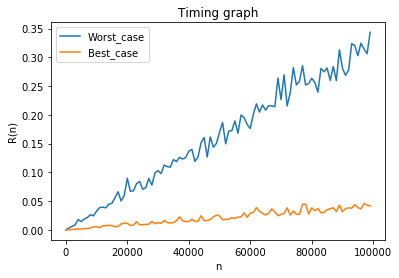

In [46]:
from timeit import default_timer as timer
import matplotlib.pyplot as plt

def output_naive(fasta, fastq):
    fasta_dic = parse_fasta(fasta)
    fastq_dic = parse_fastq(fastq)
    fq_idx =0
    for fq in fastq_dic:
        l=[]
        time = []
        for fa in fasta_dic: 
            time1=[]
            for i in range(3):
                pattern = fastq_dic[fq][0]
                qual = fastq_dic[fq][1]
                x = fasta_dic[fa]
                start = timer()
                for match in naive(pattern,x):
                    continue
                    #print("{}\t0\t{}\t{}\t0\t{}M\t*\t0\t0\t{}\t{}".format(fq, fa,match,len(pattern),pattern,qual))
                stop = timer()
                time1.append(stop-start)
            l.append(len(x))
            time.append(sum(time1)/3)
            
            
        
        plt.plot(l,time, label = fq)
        plt.xlabel('n')
        plt.ylabel('R(n)')
        plt.title('Timing graph')
        plt.legend()

    return plt.show()

output_naive("best_worst.fasta","best_worst.fastq")


Time graph for border array

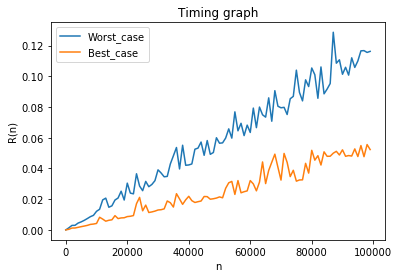

In [52]:
from timeit import default_timer as timer
import matplotlib.pyplot as plt

def output_ba(fasta, fastq):
    fasta_dic = parse_fasta(fasta)
    fastq_dic = parse_fastq(fastq)
    fq_idx =0
    for fq in fastq_dic:
        l=[]
        time = []
        for fa in fasta_dic: 
            time1=[]
            for i in range(3):
                pattern = fastq_dic[fq][0]
                qual = fastq_dic[fq][1]
                x = fasta_dic[fa]
                start = timer()
                for match in border_array(pattern,x):
                    continue
                    #print("{}\t0\t{}\t{}\t0\t{}M\t*\t0\t0\t{}\t{}".format(fq, fa,match,len(pattern),pattern,qual))
                stop = timer()
                time1.append(stop-start)
            l.append(len(x))
            time.append(sum(time1)/3)
            
            
        
        plt.plot(l,time, label = fq)
        plt.xlabel('n')
        plt.ylabel('R(n)')
        plt.title('Timing graph')
        plt.legend()

    return plt.show()

output_ba("best_worst.fasta","best_worst.fastq")

Test correctness with random sequences

In [60]:
def test(fasta, fastq):
    fasta_dic = parse_fasta(fasta)
    fastq_dic = parse_fastq(fastq)
    naive_lst=[]
    ba=[]
    for fq in fastq_dic:
        for fa in fasta_dic: 
            pattern = fastq_dic[fq][0]
            qual = fastq_dic[fq][1]
            x = fasta_dic[fa]
            for match in border_array(pattern,x):
                ba.append(("{}\t0\t{}\t{}\t0\t{}M\t*\t0\t0\t{}\t{}".format(fq, fa,match,len(pattern),pattern,qual)))
            for match in naive(pattern,x):
                naive_lst.append(("{}\t0\t{}\t{}\t0\t{}M\t*\t0\t0\t{}\t{}".format(fq, fa,match,len(pattern),pattern,qual)))             
                             
    for i in range(len(naive_lst)):
        if naive_lst[i] != ba[i]:
            print(naive_lst[i], ba[i])
    print(len(naive_lst), len(ba))

test("random.fasta","random.fastq")

4786 4786


Generate files for testing m instead of n

In [92]:
p =open("best_worst_m.fastq", "w")
for i in range(1,1000,50):
    p.write("@{}\n".format(i))
    p.write("a"*i+"\n")
    p.write("+\n"+"~"*i+"\n")
p.close()

In [93]:
f=open("best_worst_m.fasta","w")
f.write(">Worst_case\n"+"a"*100000+"\n")
f.write(">Best_case\n"+"b"*100000+"\n")
f.close()

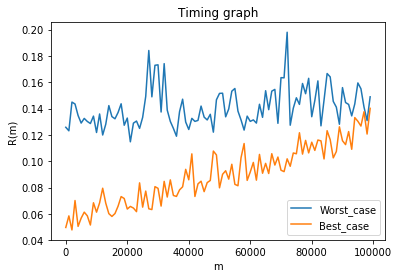

In [77]:
def output_ba(fasta, fastq):
    fasta_dic = parse_fasta(fasta)
    fastq_dic = parse_fastq(fastq)
    fq_idx =0
    for fa in fasta_dic:
        l=[]
        time = []
        for fq in fastq_dic: 
            time1=[]
            for i in range(3):
                pattern = fastq_dic[fq][0]
                qual = fastq_dic[fq][1]
                x = fasta_dic[fa]
                start = timer()
                for match in border_array(pattern,x):
                    continue
                    #print("{}\t0\t{}\t{}\t0\t{}M\t*\t0\t0\t{}\t{}".format(fq, fa,match,len(pattern),pattern,qual))
                stop = timer()
                time1.append(stop-start)
            l.append(len(pattern))
            time.append(sum(time1)/3)
            
        
        plt.plot(l,time, label = fa)
        plt.xlabel('m')
        plt.ylabel('R(m)')
        plt.title('Timing graph')
        plt.legend()

    return plt.show()

output_ba("best_worst_m.fasta","best_worst_m.fastq")

In [94]:
def output_naive(fasta, fastq):
    fasta_dic = parse_fasta(fasta)
    fastq_dic = parse_fastq(fastq)
    fq_idx =0
    for fa in fasta_dic:
        l=[]
        time = []
        for fq in fastq_dic: 
            time1=[]
            for i in range(3):
                pattern = fastq_dic[fq][0]
                qual = fastq_dic[fq][1]
                x = fasta_dic[fa]
                start = timer()
                for match in naive(pattern,x):
                    continue
                    #print("{}\t0\t{}\t{}\t0\t{}M\t*\t0\t0\t{}\t{}".format(fq, fa,match,len(pattern),pattern,qual))
                stop = timer()
                time1.append(stop-start)
            l.append(len(x))
            time.append(sum(time1)/3)
            
            
        
        plt.plot(l,time, label = fa)
        plt.xlabel('m')
        plt.ylabel('R(m)')
        plt.title('Timing graph')
        plt.legend()

    return plt.show()

output_naive("best_worst_m.fasta","best_worst_m.fastq")


KeyboardInterrupt: 

Naive: 
Worst: O(nm), Best: O(n)

Border array:
Worst: O(2n), Best: O(n+m), 
Therefore: As m approaches n, best case approaches worst case. 

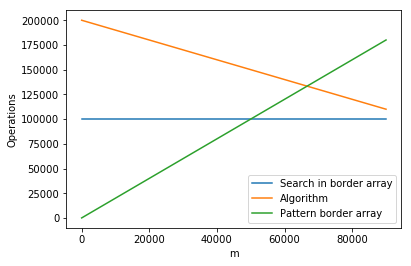

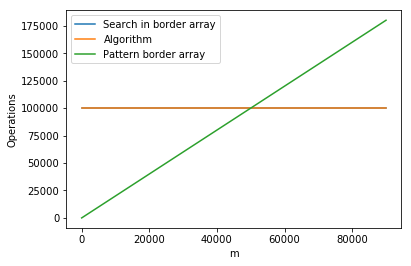

In [90]:
def border_array_counter(pattern,x):
    cc = 0
    cp = 0
    ct = 0
    pattern1 = pattern +"$"
    #border array for pattern 
    BP = [0]*len(pattern1)
    for i in range(1,len(pattern1)):
        cp+=1
        b = BP[i-1]
        while b>0 and pattern1[i] != pattern1[b]:
            b = BP[b-1]
            cp+=1
        if pattern1[i] == pattern1[b]:
            BP[i] = b+1
        else:
            BP[i] = 0
    #border array for pattern$x
    B = [0]*len(x)
    for i in range(0,len(x)):
        ct+=1
        if i == 0:
            b=0
        else:
            b = B[i-1]
        while b>0 and x[i] != pattern1[b]:
            ct+=1
            b = BP[b-1]
        if x[i] == pattern1[b]:
            B[i] = b+1
        else:
            B[i] = 0
    for i in range(len(B)):
        cc+=1
        if B[i] == len(pattern):
            continue
            #yield (i-(len(pattern)-1)+1) 
    return cc, cp, ct


def output_ba(fasta, fastq):
    fasta_dic = parse_fasta(fasta)
    fastq_dic = parse_fastq(fastq)
    fq_idx =0
    for fa in fasta_dic:
        l=[]
        cc_1 = []
        ct_1=[]
        cp_1=[]
        for fq in fastq_dic: 
            pattern = fastq_dic[fq][0]
            qual = fastq_dic[fq][1]
            x = fasta_dic[fa]
            cc,cp,ct = border_array_counter(pattern,x)
            l.append(len(pattern))
            cc_1.append(cc)
            ct_1.append(ct)
            cp_1.append(cp)
        plt.plot(l,cc_1, label = "Search in border array")
        plt.plot(l,ct_1, label = "Algorithm")
        plt.plot(l,cp_1, label = "Pattern border array")
        plt.xlabel('m')
        plt.ylabel('Operations')
        plt.title('')
        plt.legend()
        plt.show()
    return 

output_ba("best_worst_m.fasta","best_worst_m.fastq")